In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/../Resources/Mouse_metadata.csv"
study_results_path = "/../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(combined_df['Mouse ID'].value_counts())

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].value_counts())

248

**Summary Statistics**

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_df = clean_df.groupby("Drug Regimen")

mean_tumor = regimen_df["Tumor Volume (mm3)"].mean()
median_tumor = regimen_df["Tumor Volume (mm3)"].median()
var_tumor = regimen_df["Tumor Volume (mm3)"].var()
std_tumor = regimen_df["Tumor Volume (mm3)"].std()
sem_tumor = regimen_df["Tumor Volume (mm3)"].sem(ddof=0)

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor,
                           "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev.": std_tumor,
                           "Tumor Volume Std. Err.": sem_tumor})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


**Bar and Pie Charts**

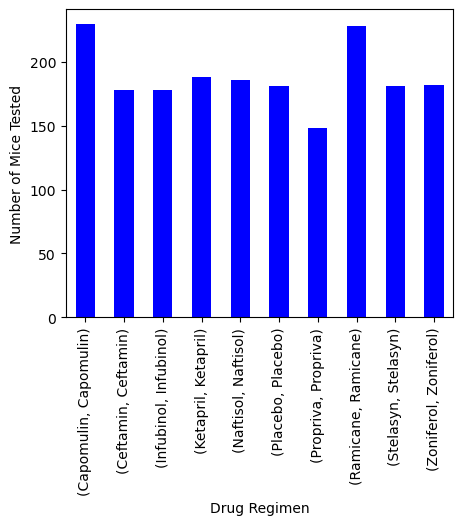

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

figure1 = regimen_df["Drug Regimen"].value_counts().plot(kind="bar", facecolor="blue", figsize=(5,4),
                                                         xlabel="Drug Regimen", ylabel="Number of Mice Tested")


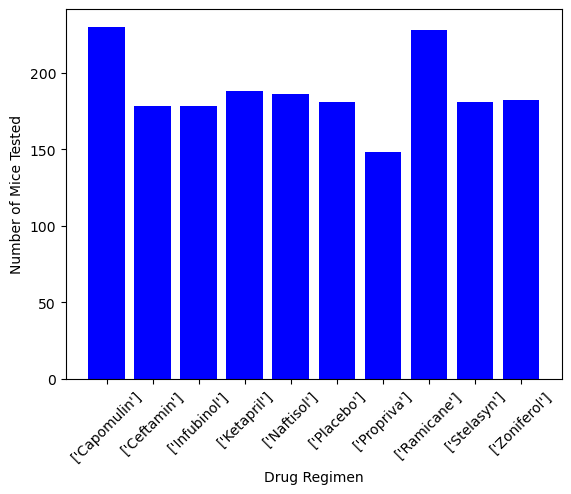

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_count = regimen_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(regimen_df["Drug Regimen"]))
tick_labels= regimen_df["Drug Regimen"].unique()
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, mice_count, facecolor="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(tick_locations, tick_labels,rotation=45)
plt.show()

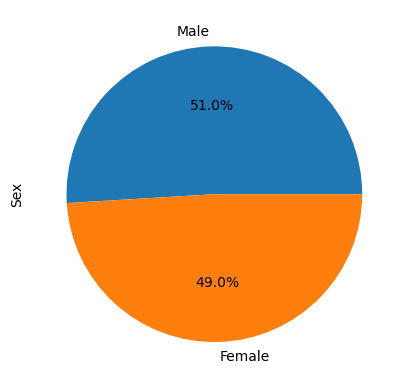

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df["Sex"].value_counts()

figure2=sex_df.plot(kind="pie", y="Sex", autopct="%1.1f%%")

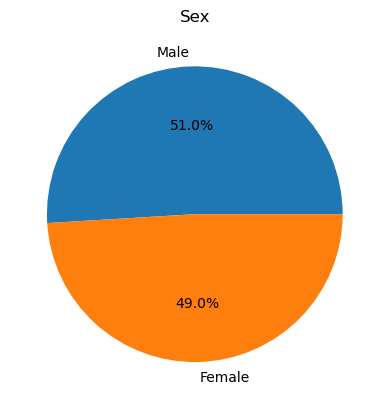

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_df, labels=("Male","Female"), autopct="%1.1f%%")
plt.title("Sex")
plt.show()

**Quartiles, Outliers, and Box Plots**

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())

max_time.rename(columns={"Timepoint": "Max Timepoint"}, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_clean_df = pd.merge(clean_df, max_time, on='Mouse ID')

new_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments: 
    vol_df = new_clean_df.loc[new_clean_df["Drug Regimen"]==x, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol.append(vol_df)

    # Determine outliers using upper and lower bounds
    quartiles = vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} for {x} could be outliers.")
    print(f"Values above {upper_bound} for {x} could be outliers.")

Values below 26.714832162499995 for Capomulin could be outliers.
Values above 55.9711007025 for Capomulin could be outliers.
Values below 24.1865864625 for Ramicane could be outliers.
Values above 57.488048122500004 for Ramicane could be outliers.
Values below 32.309217298749985 for Infubinol could be outliers.
Values above 72.31757996875001 for Infubinol could be outliers.
Values below 32.81891142624998 for Ceftamin could be outliers.
Values above 71.19095325625001 for Ceftamin could be outliers.


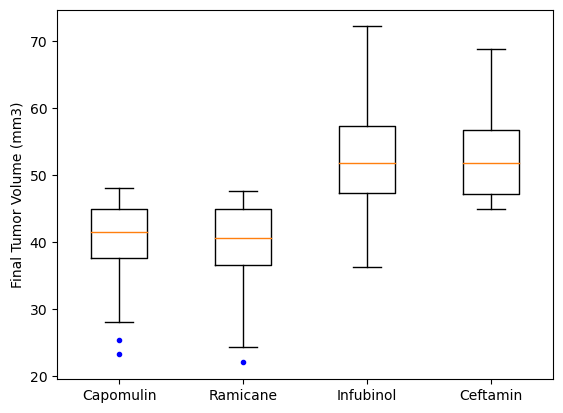

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol, labels=treatments, sym="b.")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

**Line and Scatter Plots**

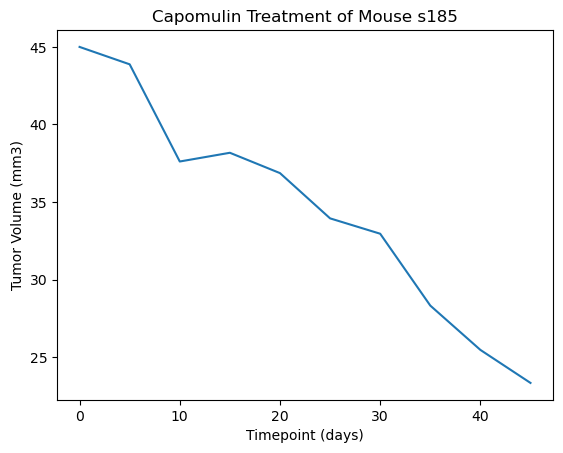

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = new_clean_df.loc[new_clean_df["Drug Regimen"]=="Capomulin"]

cmouse_df = cap_df.loc[cap_df["Mouse ID"]=="s185"]

x_axis = cmouse_df["Timepoint"]
y_axis = cmouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

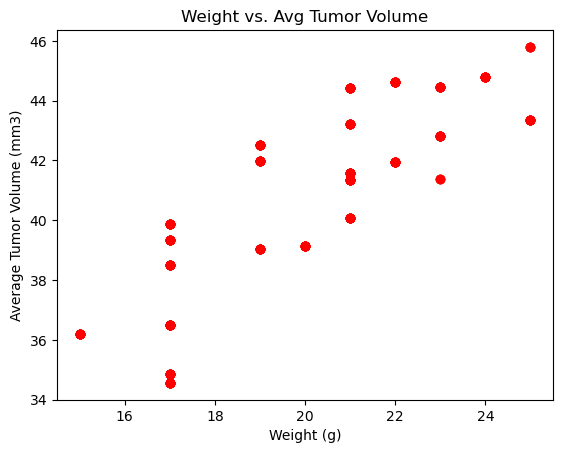

In [119]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_df = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

avg_df

new_cap_df = pd.merge(cap_df, avg_df, on="Mouse ID")

x_axis = new_cap_df["Weight (g)"]
y_axis = new_cap_df["Tumor Volume (mm3)_y"]

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.title("Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

**Correlation and Regression**

The correlation between mouse weight and the average tumor volume is 0.83


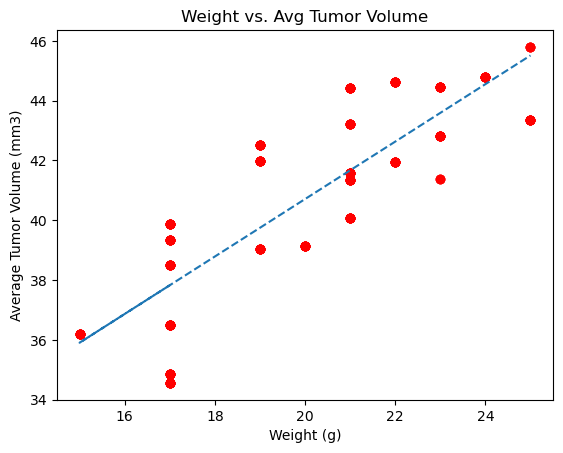

In [129]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_df = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

avg_df

new_cap_df = pd.merge(cap_df, avg_df, on="Mouse ID")

x_axis = new_cap_df["Weight (g)"]
y_axis = new_cap_df["Tumor Volume (mm3)_y"]

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

c_slope, c_int, c_r, c_p, c_std_err = st.linregress(x_axis, y_axis) 
c_fit = c_slope*x_axis + c_int

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.plot(x_axis,c_fit,"--")
plt.title("Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
